# Explore

## Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [44]:
from env import user, password, host
from acquire import get_opsd, get_sql
from prepare import check_columns, prep_store, prep_opsd
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import itertools

### Store Explore

In [45]:
store = get_sql()

Total rows: 913000
Total columns: 16


In [46]:
store = prep_store(store)

In [47]:
check_columns(store)

Total rows: 913000
Total columns: 18


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,sale_id,int64,913000,0,0.0,"[1, 295813, 125995, 314073, 332333, 350593, 10...","[1.0, 913000.0, 456500.5]"
1,store_id,int64,10,0,0.0,"[1, 3, 10, 9, 2, 4, 6, 8, 7, 5]","[1.0, 10.0, 5.5]"
2,item_id,int64,50,0,0.0,"[1, 17, 7, 18, 19, 20, 6, 21, 22, 5, 23, 24, 2...","[1.0, 50.0, 25.5]"
3,sale_amount,int64,213,0,0.0,"[13, 26, 32, 45, 34, 29, 25, 50, 8, 12, 36, 62...","[0.0, 231.0, 52.250286966046005]"
4,item_id.1,int64,50,0,0.0,"[1, 17, 7, 18, 19, 20, 6, 21, 22, 5, 23, 24, 2...","[1.0, 50.0, 25.5]"
5,item_upc14,int64,50,0,0.0,"[35200264013, 88313590791, 70177154004, 212007...","[8500004528.0, 884623708976.0, 238468784491.04..."
6,item_upc12,int64,50,0,0.0,"[35200264013, 88313590791, 70177154004, 212007...","[8500004528.0, 884623708976.0, 238468784491.04..."
7,item_brand,object,49,0,0.0,"[Riceland, Ducal, Twinings Of London, Scotch, ...",None
8,item_name,object,50,0,0.0,"[Riceland American Jazmine Rice, Ducal Refried...",None
9,item_price,float64,47,0,0.0,"[0.84, 1.16, 9.64, 4.39, 0.74, 5.62, 6.93, 8.0...","[0.6, 9.64, 5.160400000000002]"


In [56]:
# Splits
train = store.loc[:'2015']
validate = store.loc['2016']
test = store.loc['2017']

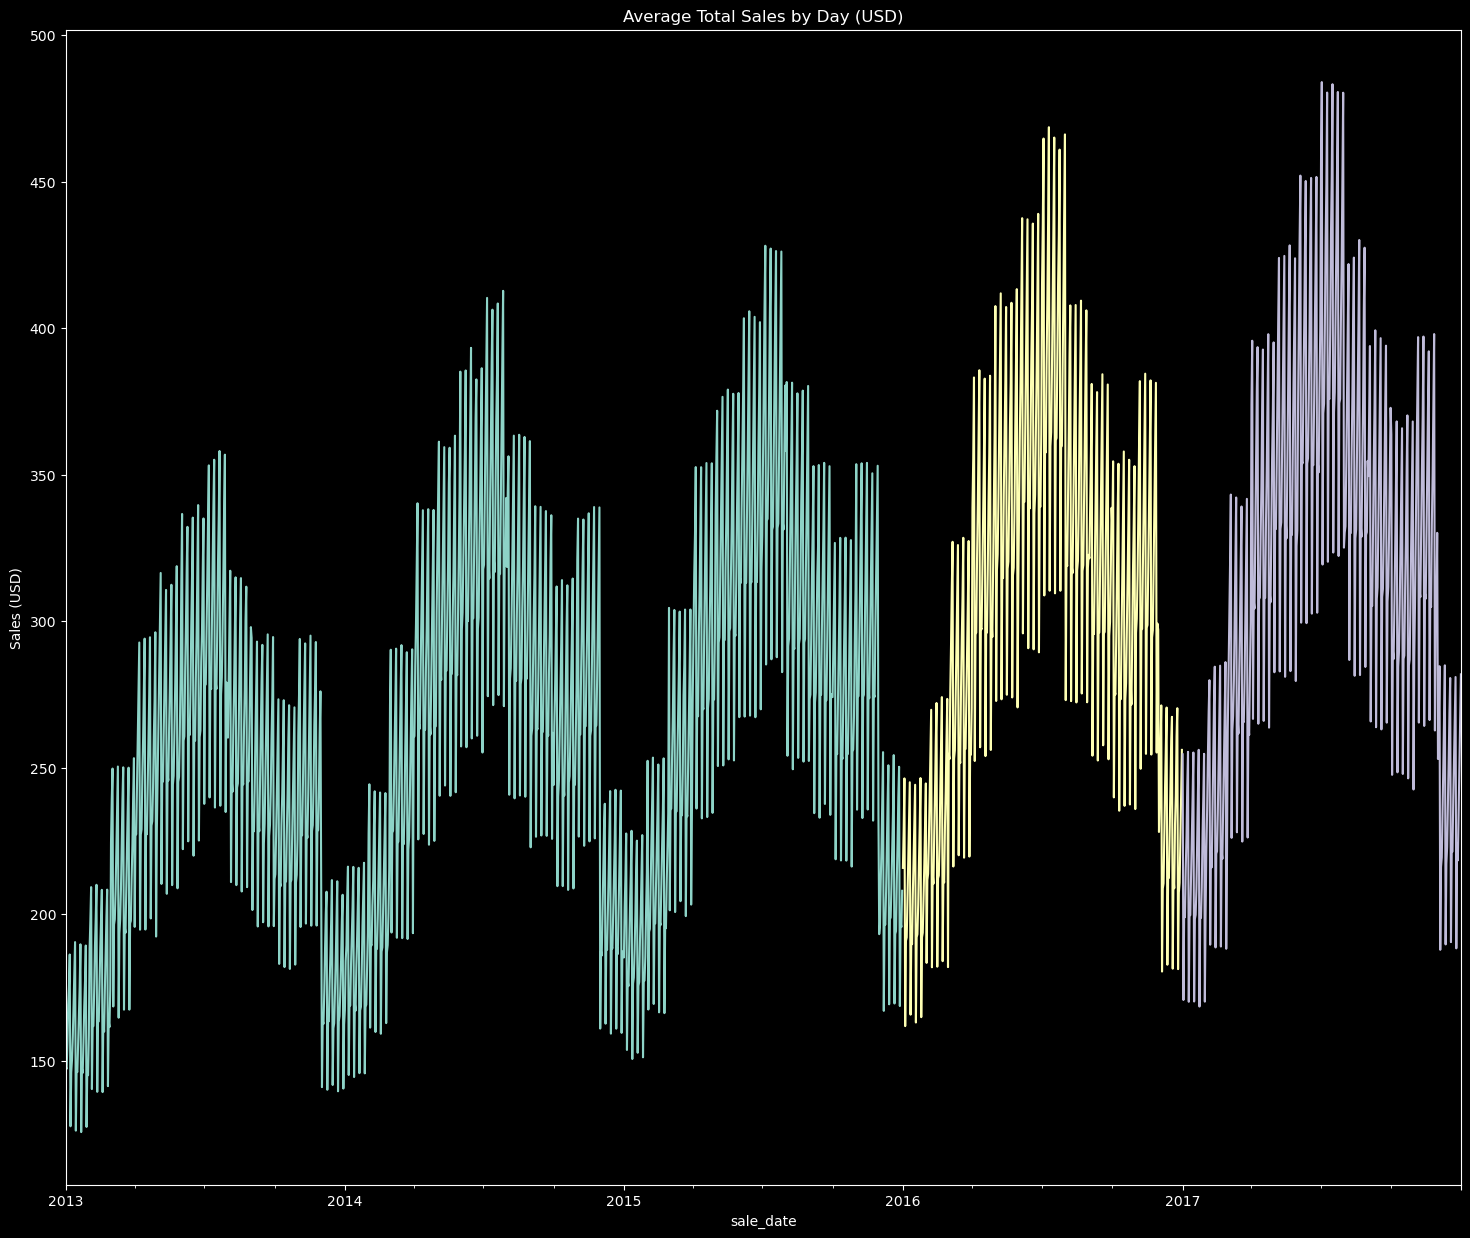

In [59]:
# Viz splits
train.resample('D').sales_total.mean().plot()
validate.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()
plt.title('Average Total Sales by Day (USD)')
plt.ylabel('Sales (USD)')
plt.show()

In [65]:
# Assign sales resampled by month to a variable
sales_month = train['sales_total'].resample('M').mean()

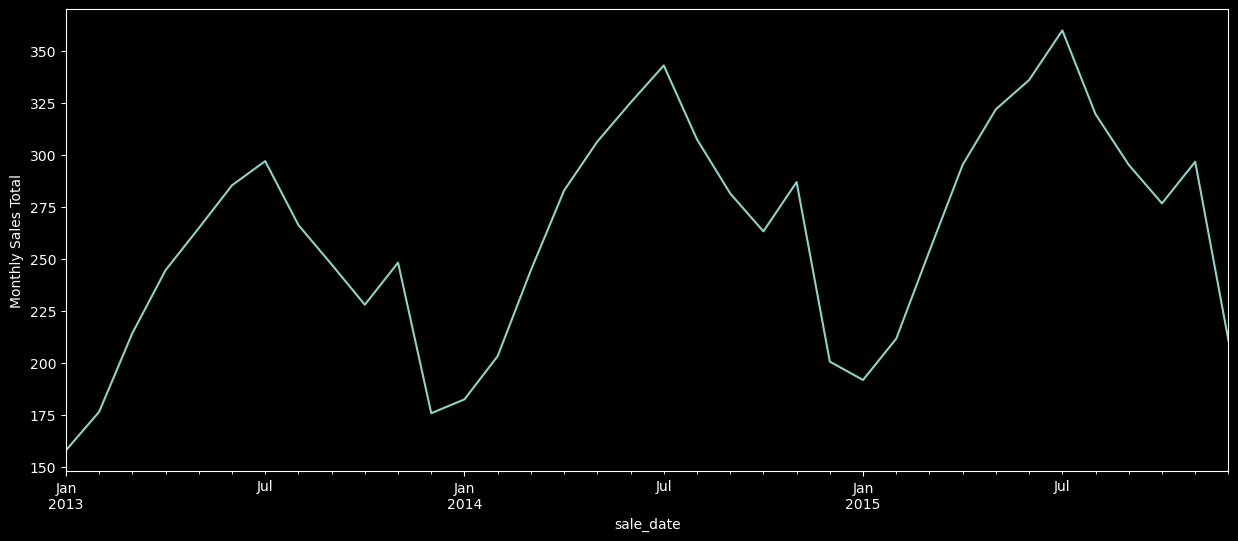

In [66]:
# Plot average sales by month
sales_month.plot(figsize=(15, 6))
plt.ylabel('Monthly Sales Total')
plt.show()

- High summer spending
- Large holiday spike
- Big drop after holidays

In [63]:
# Assign sales resampled by day to a variable
sales_day = train['sales_total'].resample('D').mean()

<Axes: xlabel='sale_date'>

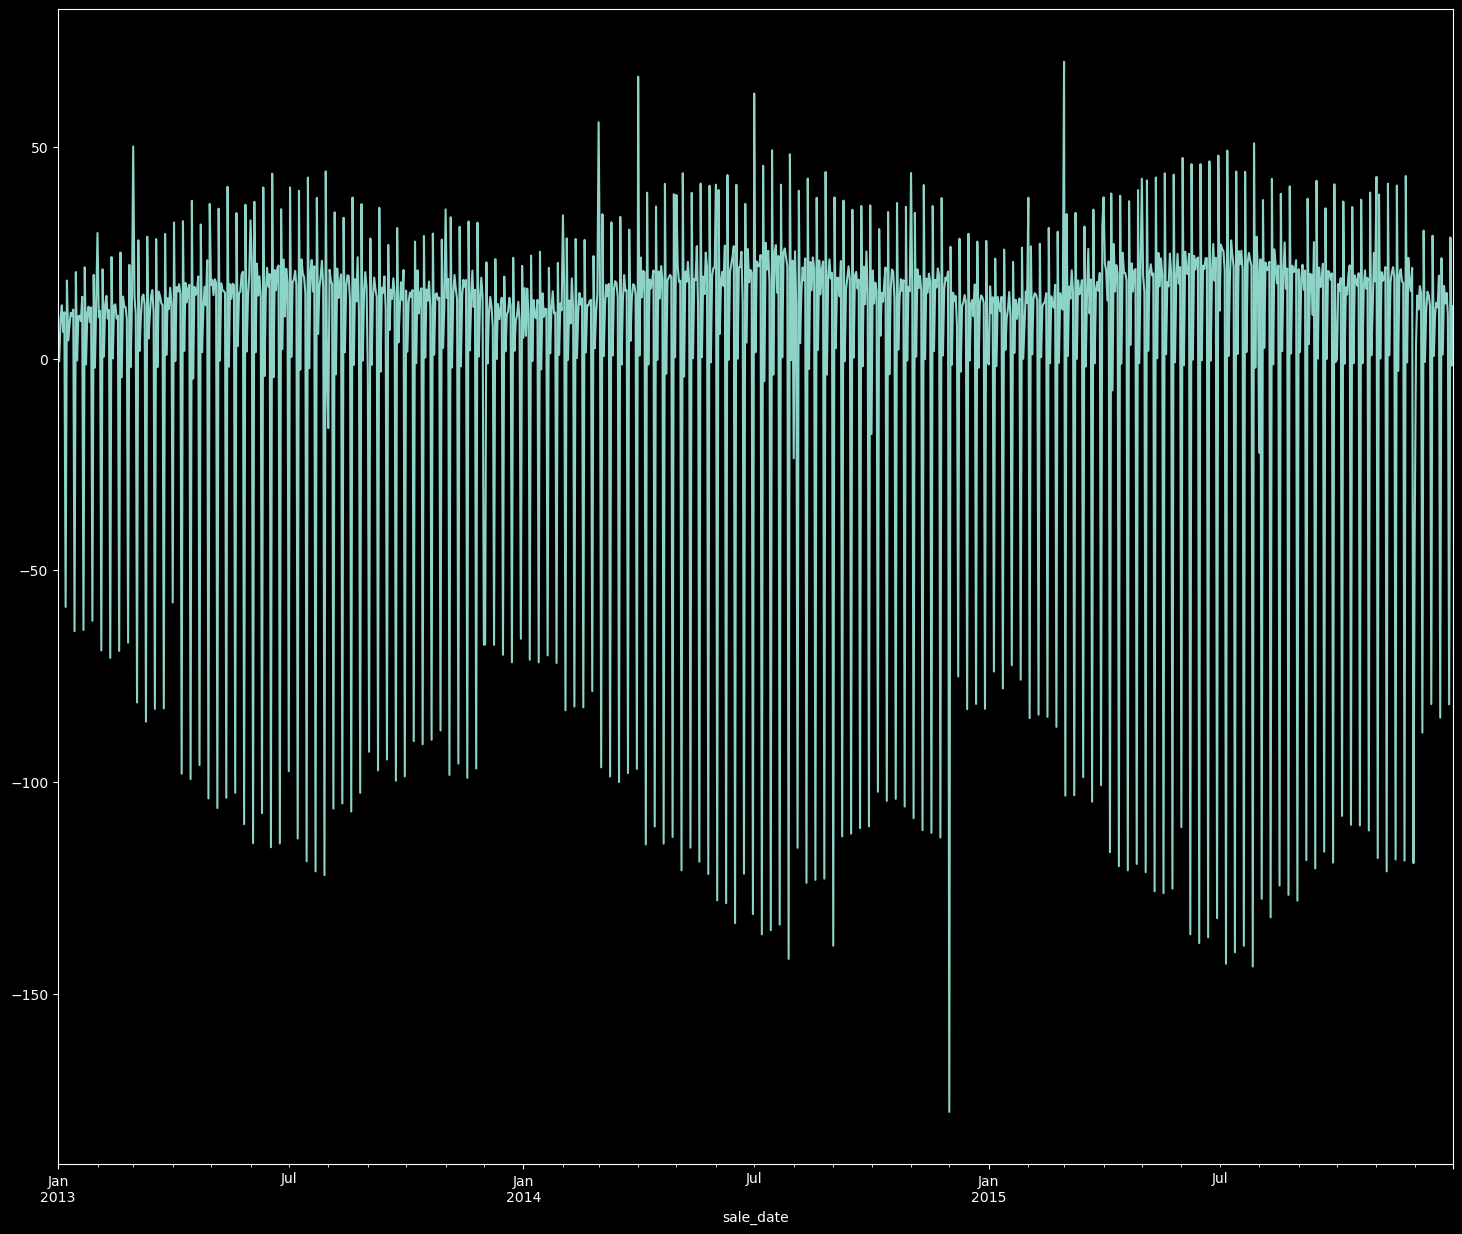

In [67]:
sales_day.diff().plot()

- High summer spending
- Large holiday spike
- Big drop after holidays

In [68]:
# Assign sales resampled by day to a variable
sales_week = train['sales_total'].resample('W').mean()

<Axes: xlabel='sale_date'>

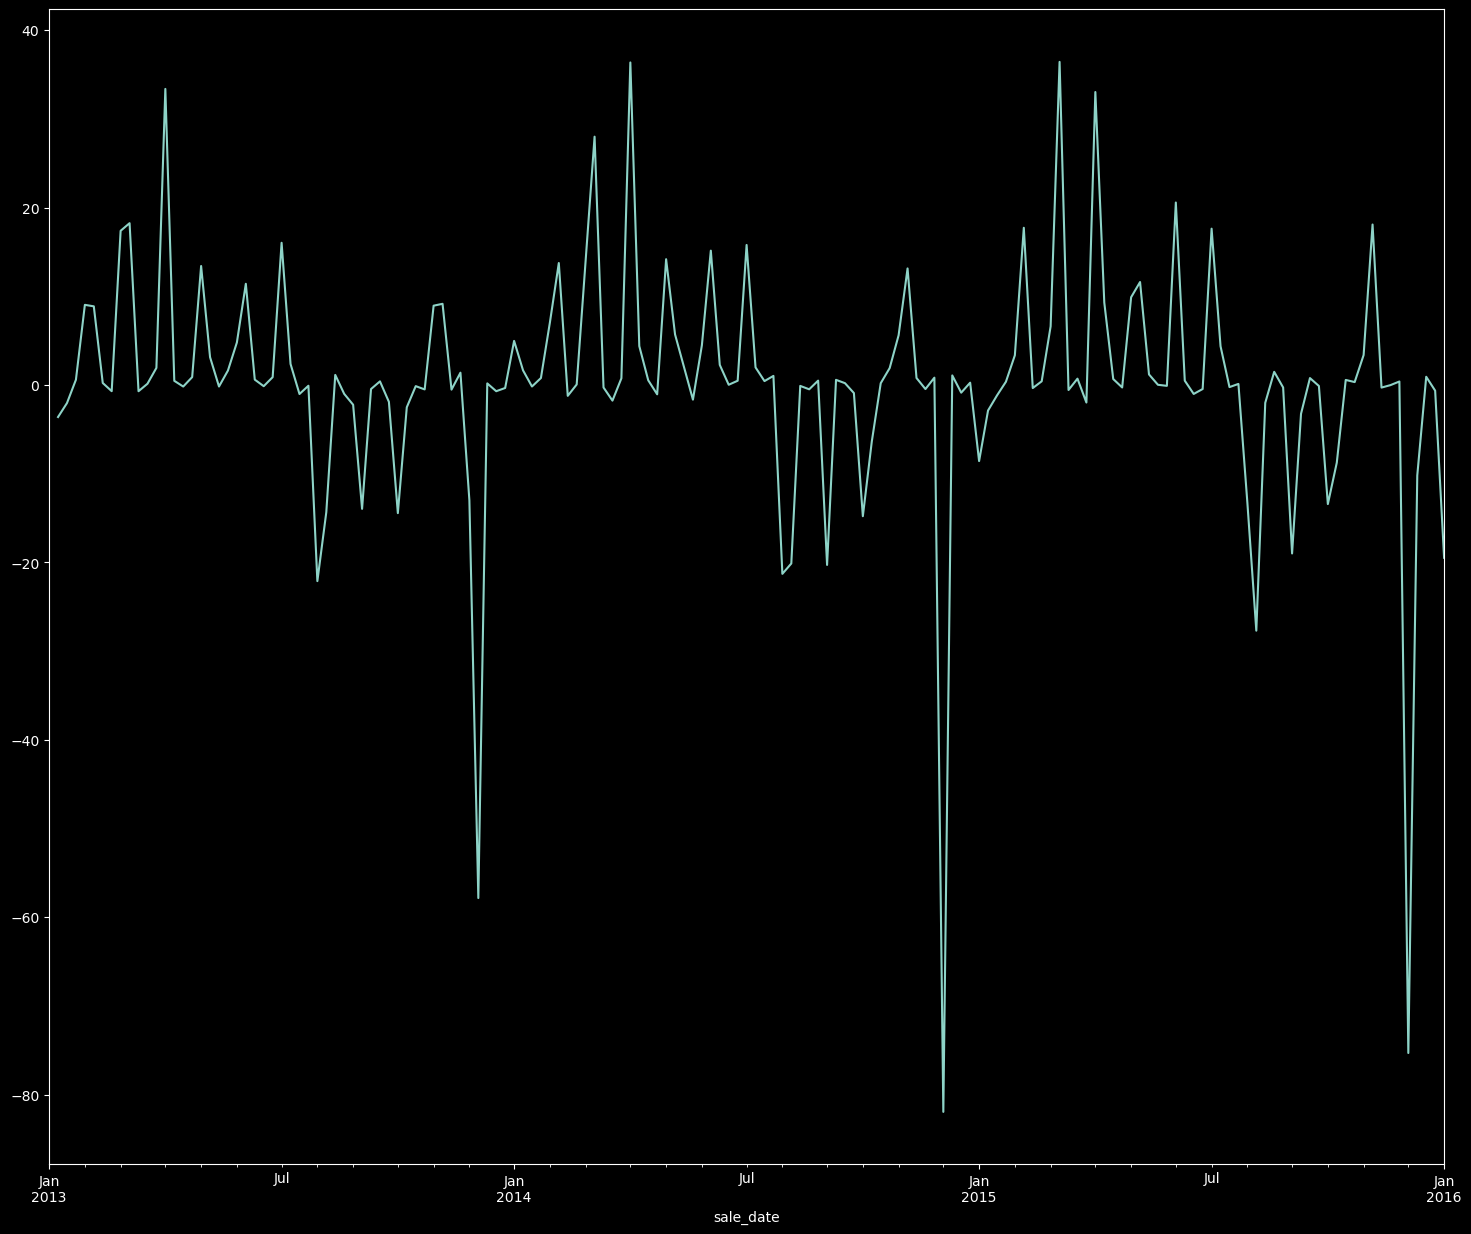

In [69]:
sales_week.diff().plot()

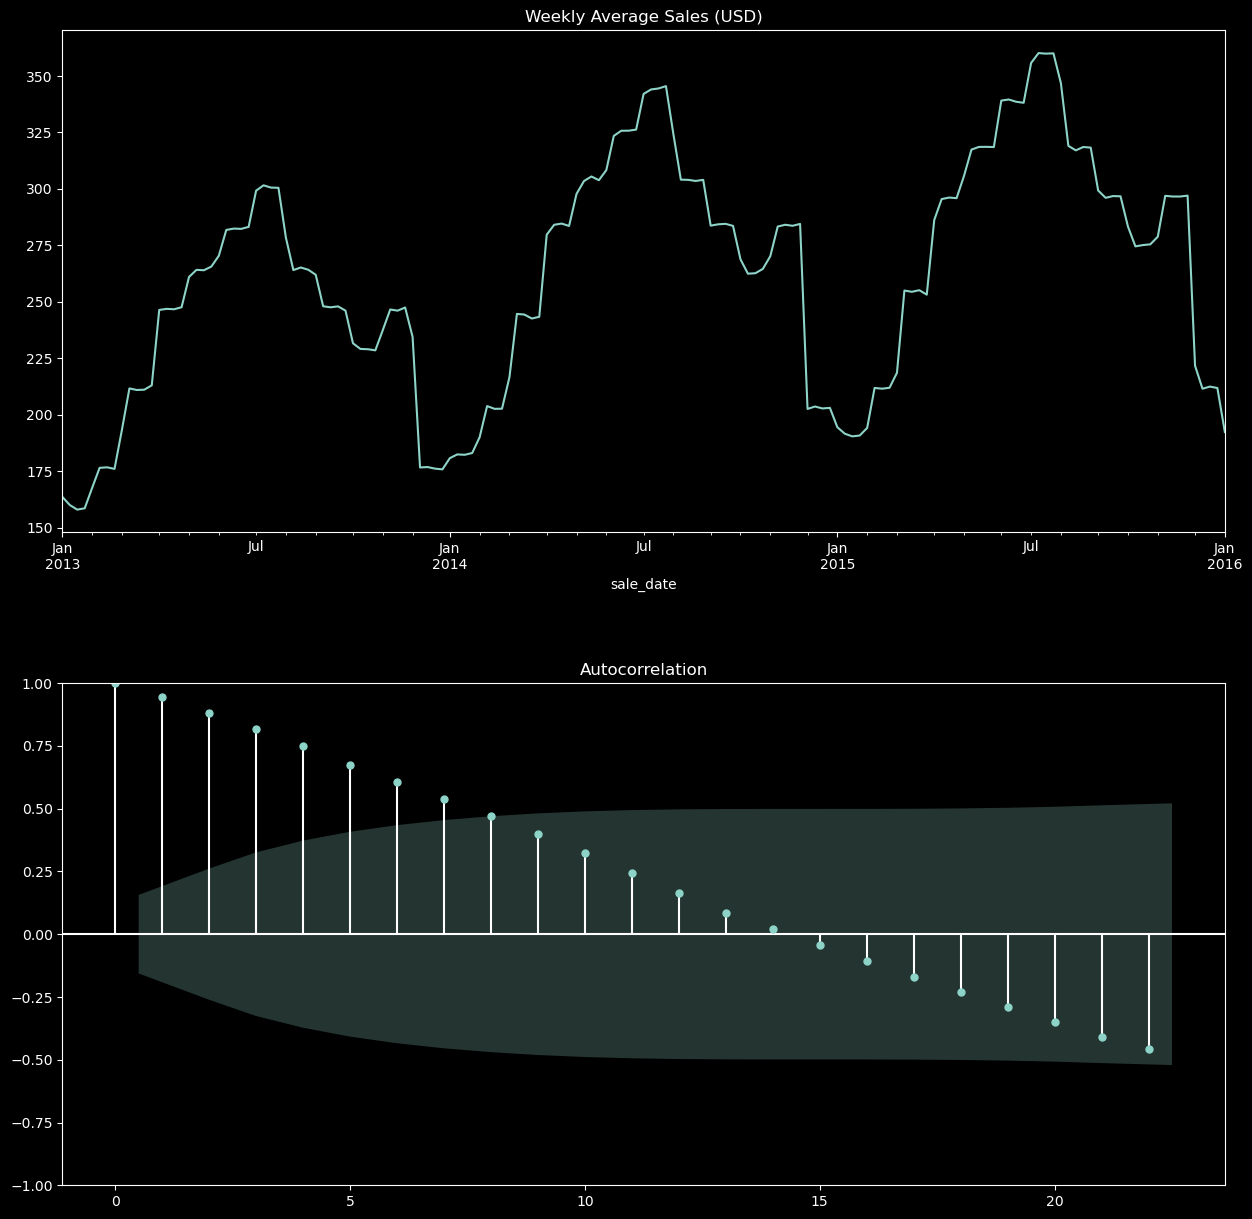

In [73]:
# Plot sales_week with autocorrelation

fig, ax = plt.subplots(2, figsize=(15, 15))
ax[0] = sales_week.plot(ax=ax[0])
ax[0].set_title('Weekly Average Sales (USD)')
ax[1] = sm.graphics.tsa.plot_acf(sales_week, ax=ax[1])
fig.subplots_adjust(hspace=0.3)
plt.show()

The autocorrelation graph shows the correlation between a time series and its lagged values. Specifically, it plots the autocorrelation function (ACF) of the time series, which is a measure of the correlation between the time series and its lagged values at different lags.

In the autocorrelation graph, the x-axis represents the lag (i.e., the number of time periods between the current value and the lagged value), and the y-axis represents the autocorrelation coefficient (i.e., the correlation between the current value and the lagged value). The autocorrelation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation.

The autocorrelation graph can be used to identify patterns in the time series that are related to its own past values. For example, if the autocorrelation coefficients are high and positive for several lags, it may indicate that the time series has a strong positive autocorrelation and that past values are good predictors of future values. Conversely, if the autocorrelation coefficients are low or negative, it may indicate that the time series is not strongly correlated with its past values and that other factors may be influencing its behavior. 

The graph shows the autocorrelation coefficients for different lags, which can be used to identify any patterns or trends in the time series.

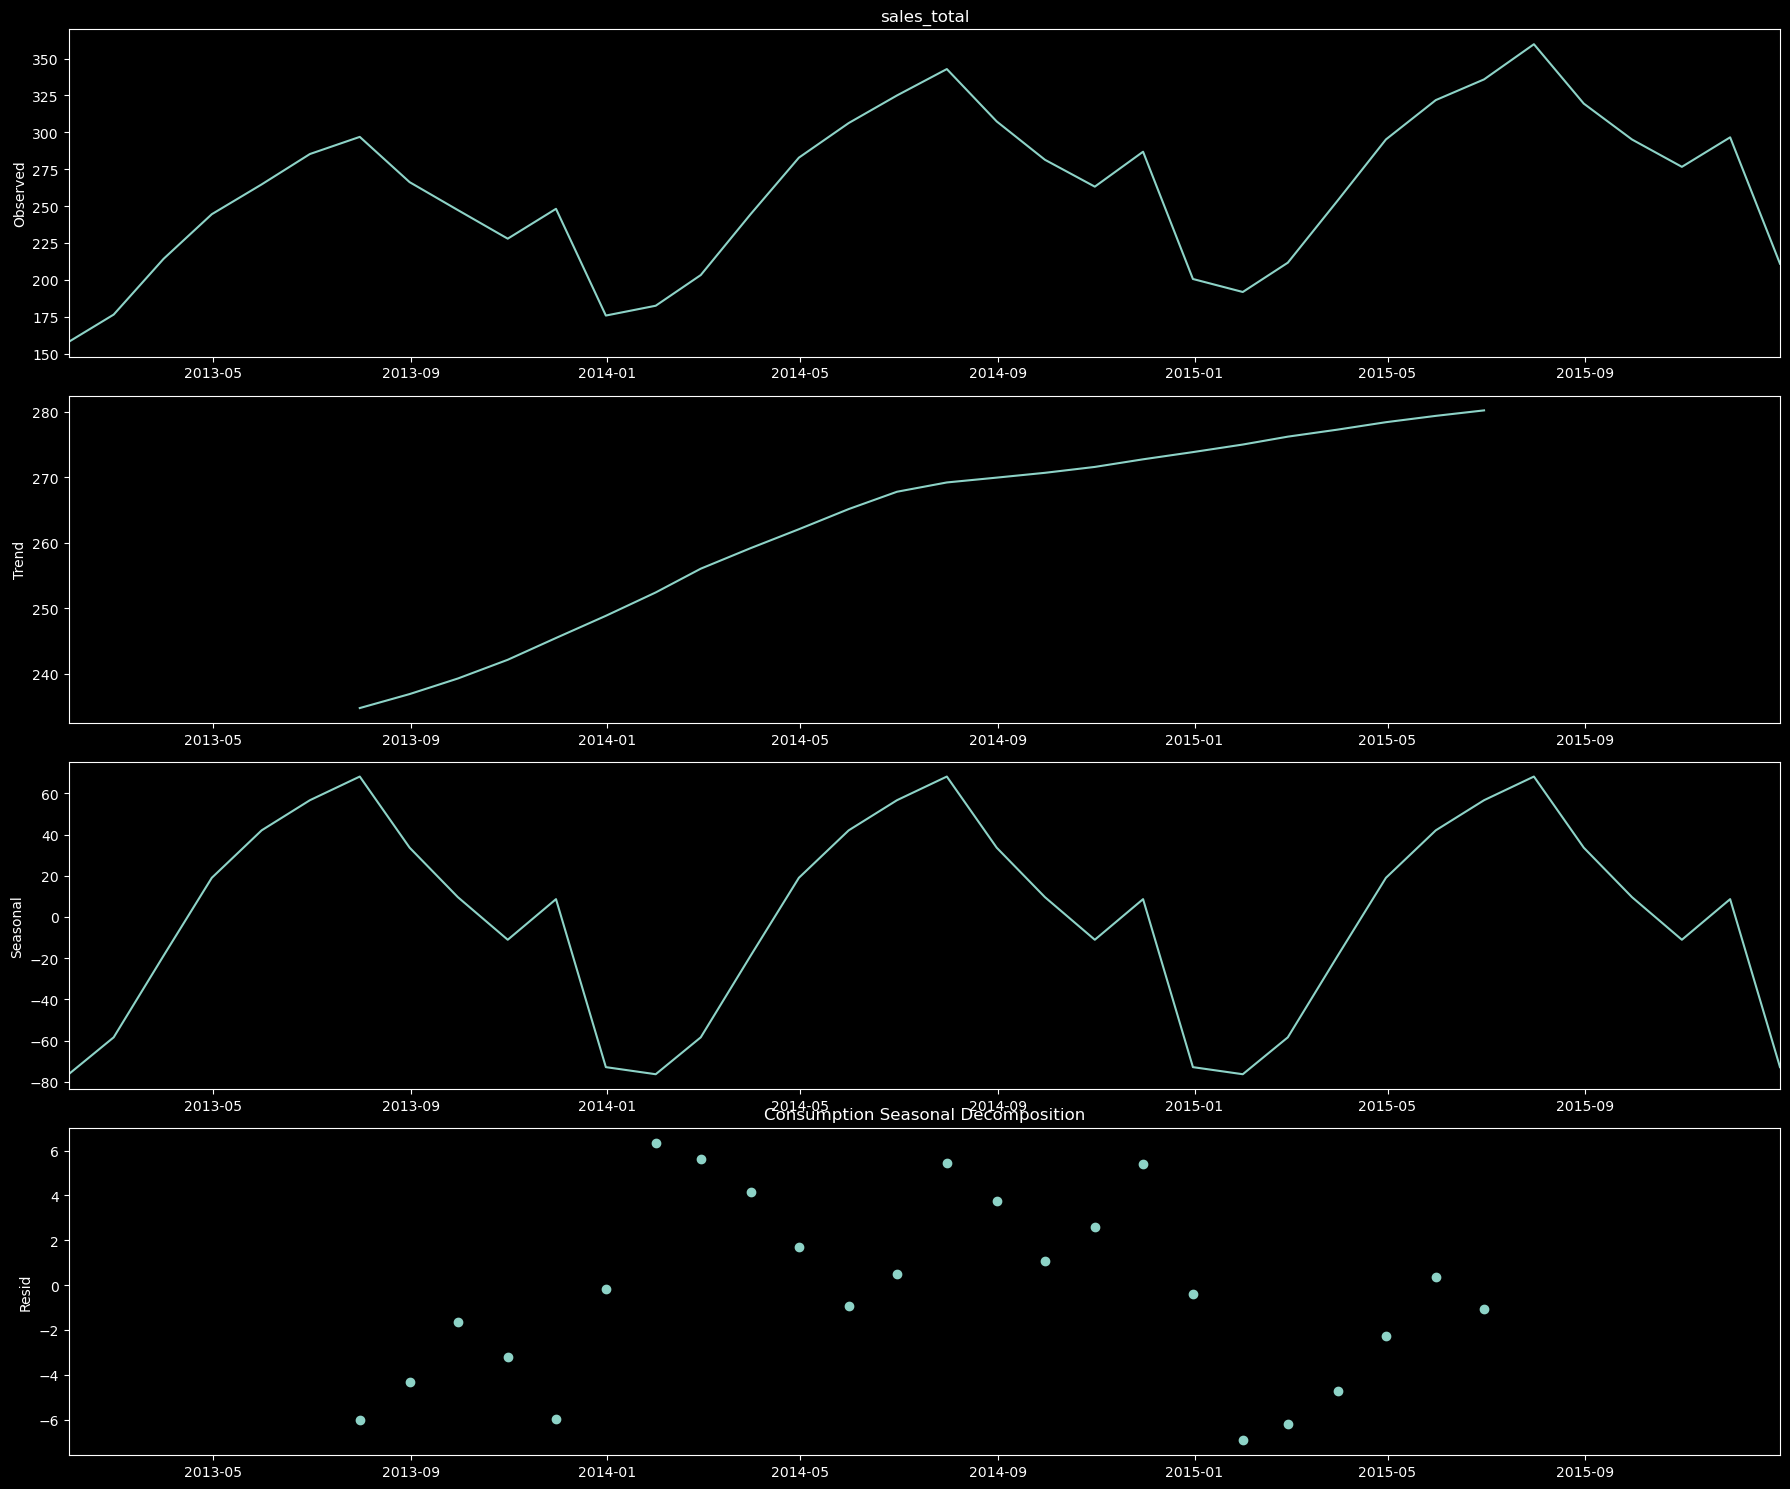

In [62]:
decomposition = sm.tsa.seasonal_decompose(sales_month, model='additive')
fig = decomposition.plot()
fig.axes[0].set_ylabel('Observed')
# Set a larger figure size
rcParams['figure.figsize'] = 18, 15
plt.title('Consumption Seasonal Decomposition')
plt.show()

In the seasonal decomposition plot, the plot labeled "resid" shows the residuals of the time series after removing the seasonal and trend components. The residuals are the differences between the observed values and the values predicted by the seasonal and trend components. 

The "resid" plot can be used to check if there is any remaining pattern or structure in the time series after removing the seasonal and trend components. If there is still a pattern in the residuals, it may indicate that there is some other underlying factor affecting the time series that has not been accounted for. 

In general, the residuals should be random and have no discernible pattern. If there is a pattern in the residuals, it may indicate that the seasonal decomposition model is not capturing all of the underlying patterns in the time series.

### OPSD Explore

In [24]:
opsd = get_opsd()

In [25]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [26]:
opsd = prep_opsd(opsd)

In [29]:
check_columns(opsd)

Total rows: 4383
Total columns: 6


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,consumption,float64,4374,0,0.0,"[1069.1840000000002, 1380.5210000000002, 1442....","[842.395, 1709.5679999999998, 1338.6758355897787]"
1,wind,float64,2914,0,0.0,"[0.0, 48.709, 24.628000000000004, 22.963, 59.3...","[0.0, 826.2779999999999, 109.92281838923111]"
2,solar,float64,2186,0,0.0,"[0.0, 6.587, 6.574000000000001, 24.679, 14.681...","[0.0, 241.57999999999996, 44.64292128678987]"
3,wind_and_solar,float64,2187,0,0.0,"[0.0, 234.05200000000005, 213.901, 498.147, 51...","[0.0, 851.556, 136.26167305498518]"
4,month,int32,12,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",None
5,year,int32,12,0,0.0,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...",None


In [76]:
# Splits
train = opsd.loc[:'2015']
validate = opsd.loc['2016']
test = opsd.loc['2017']

In [77]:
cons = train['consumption'].resample('M').mean()
wind = train['wind'].resample('M').mean()
solar = train['solar'].resample('M').mean()

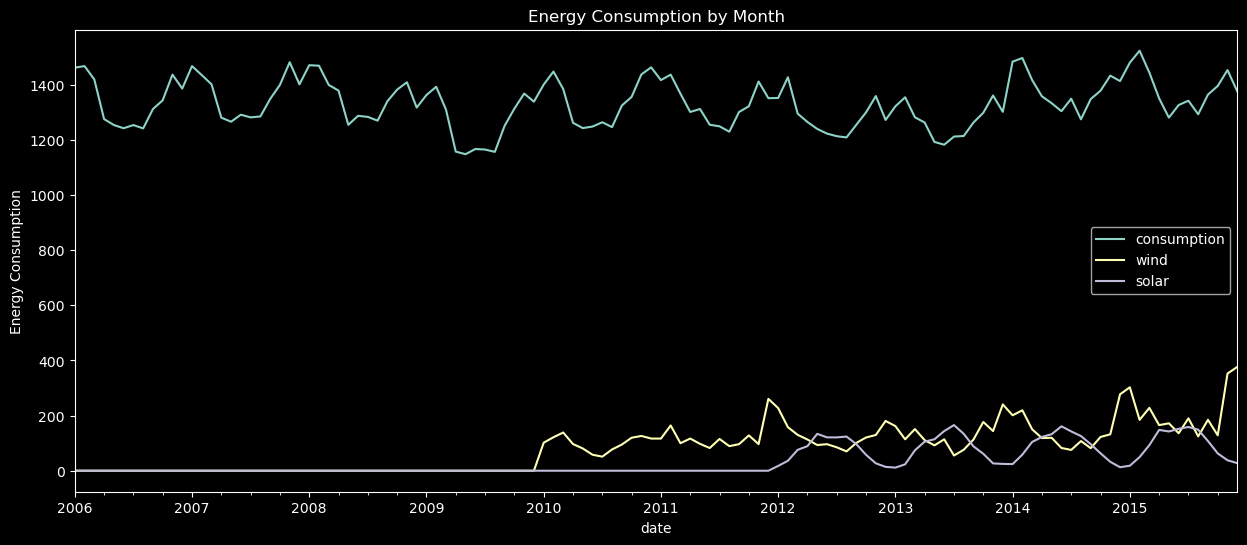

In [86]:
cons.plot(figsize=(15, 6))
wind.plot()
solar.plot()
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Month')
plt.legend()
plt.show()

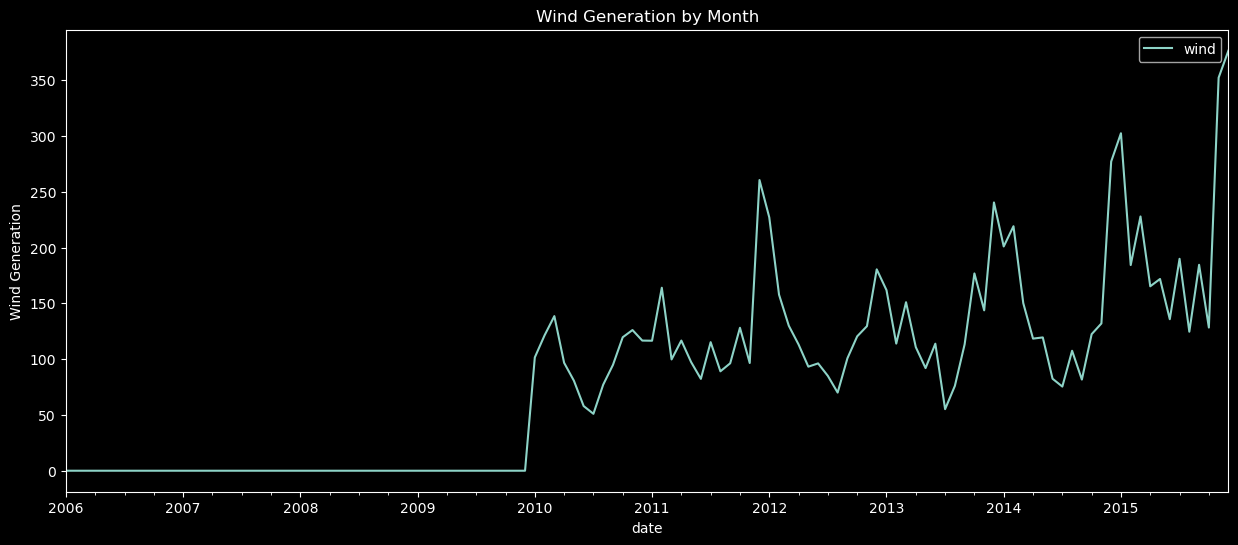

In [85]:
wind.plot(figsize=(15, 6))
plt.ylabel('Wind Generation')
plt.title('Wind Generation by Month')
plt.legend()
plt.show()

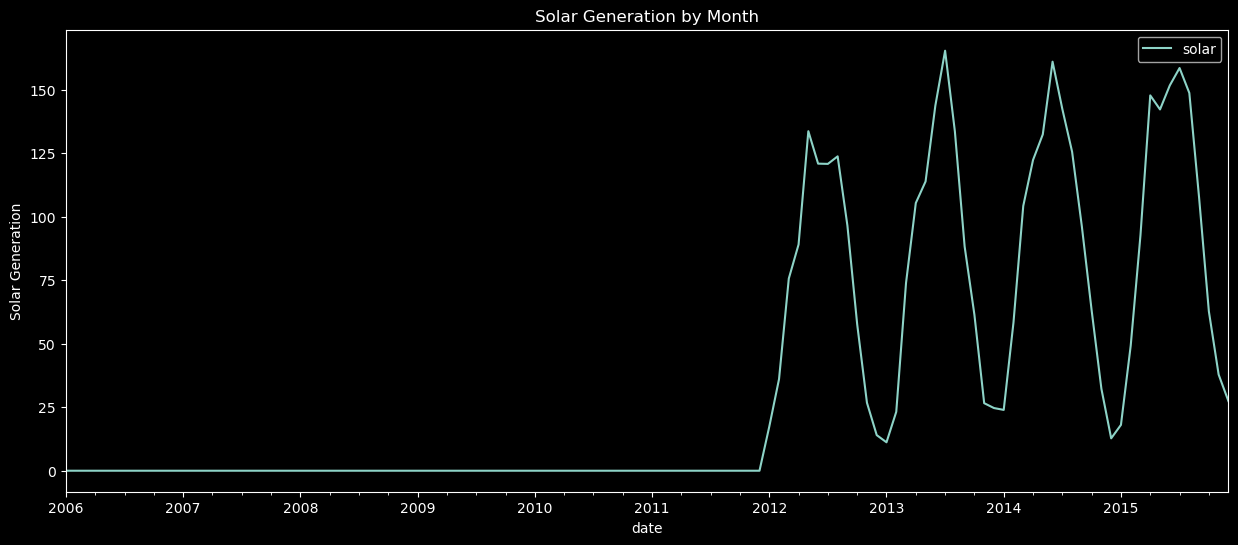

In [84]:
solar.plot(figsize=(15, 6))
plt.ylabel('Solar Generation')
plt.title('Solar Generation by Month')
plt.legend()
plt.show()

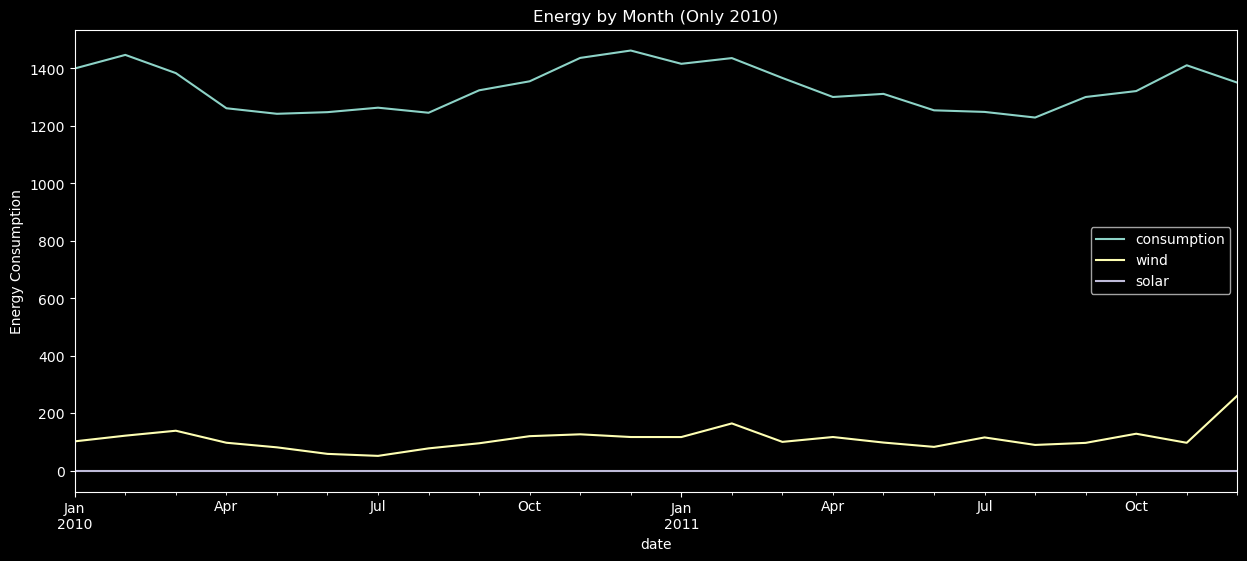

In [83]:
cons.loc['2010':'2011'].plot(figsize=(15, 6))
wind.loc['2010':'2011'].plot()
solar.loc['2010':'2011'].plot()
plt.ylabel('Energy Consumption')
plt.title('Energy by Month (Only 2010)')
plt.legend()
plt.show()

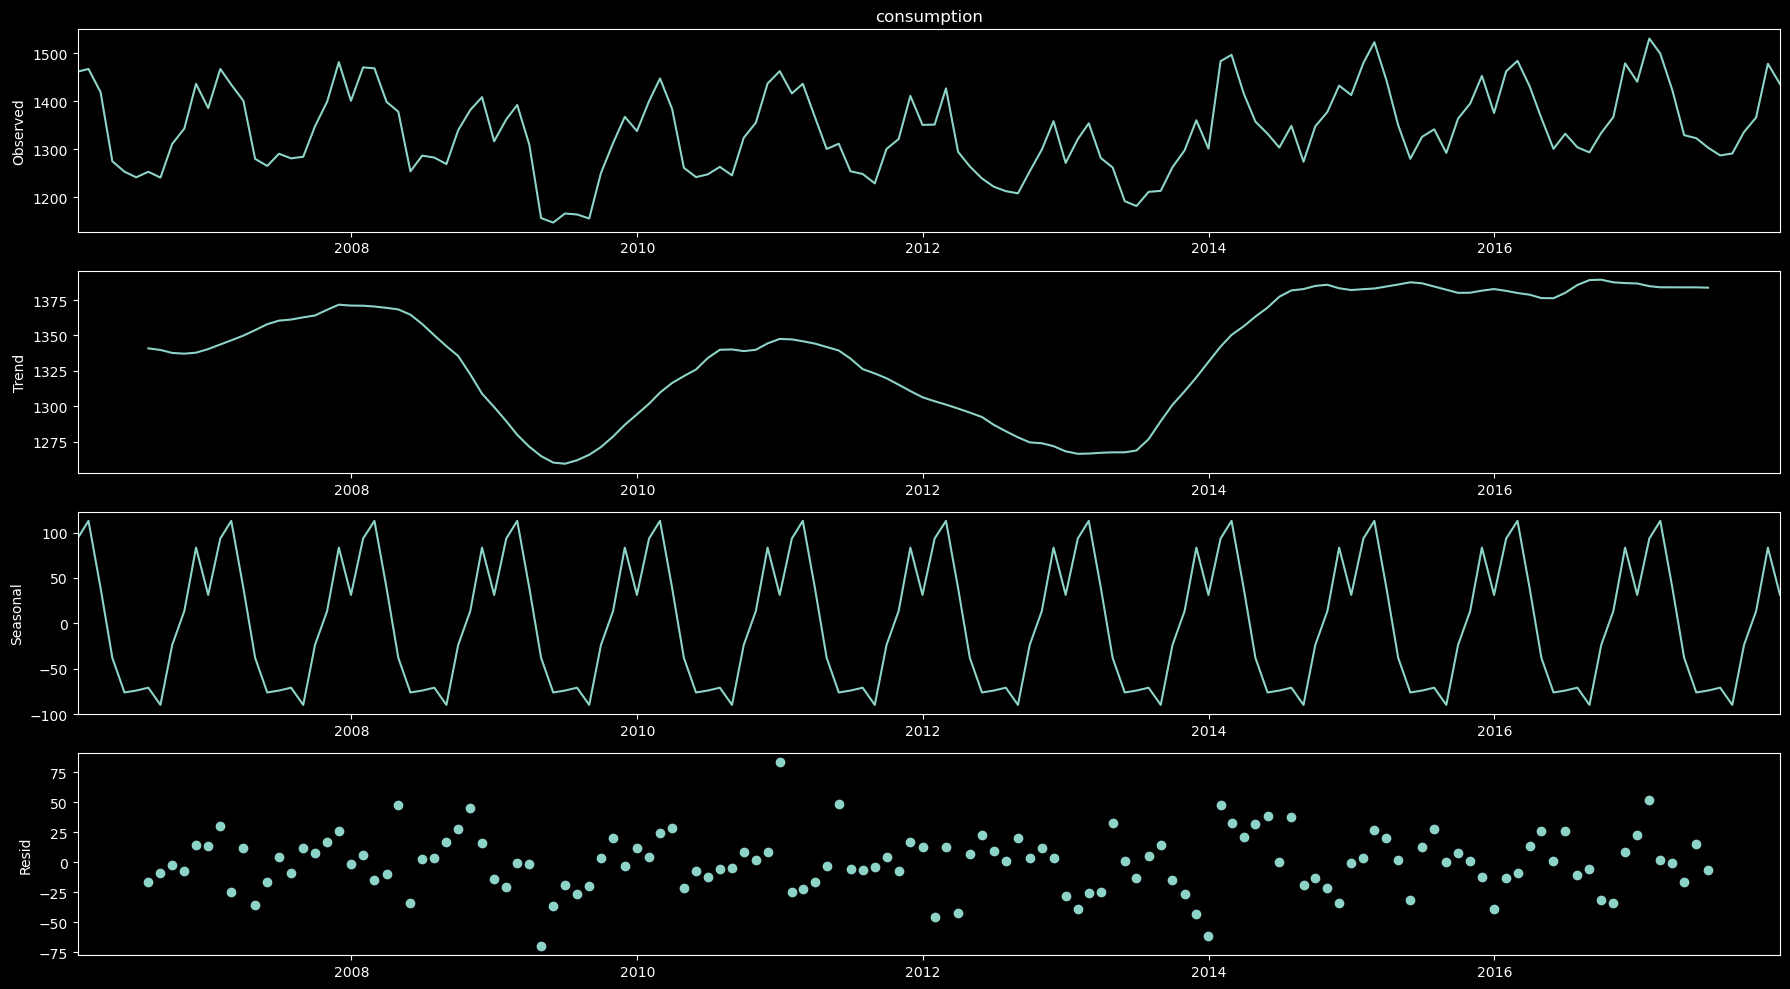

In [35]:
decomposition = sm.tsa.seasonal_decompose(cons, model='additive')
fig = decomposition.plot()
fig.axes[0].set_ylabel('Observed')
# Set a larger figure size
rcParams['figure.figsize'] = 18, 15
plt.title('Consumption Seasonal Decomposition')
plt.show()

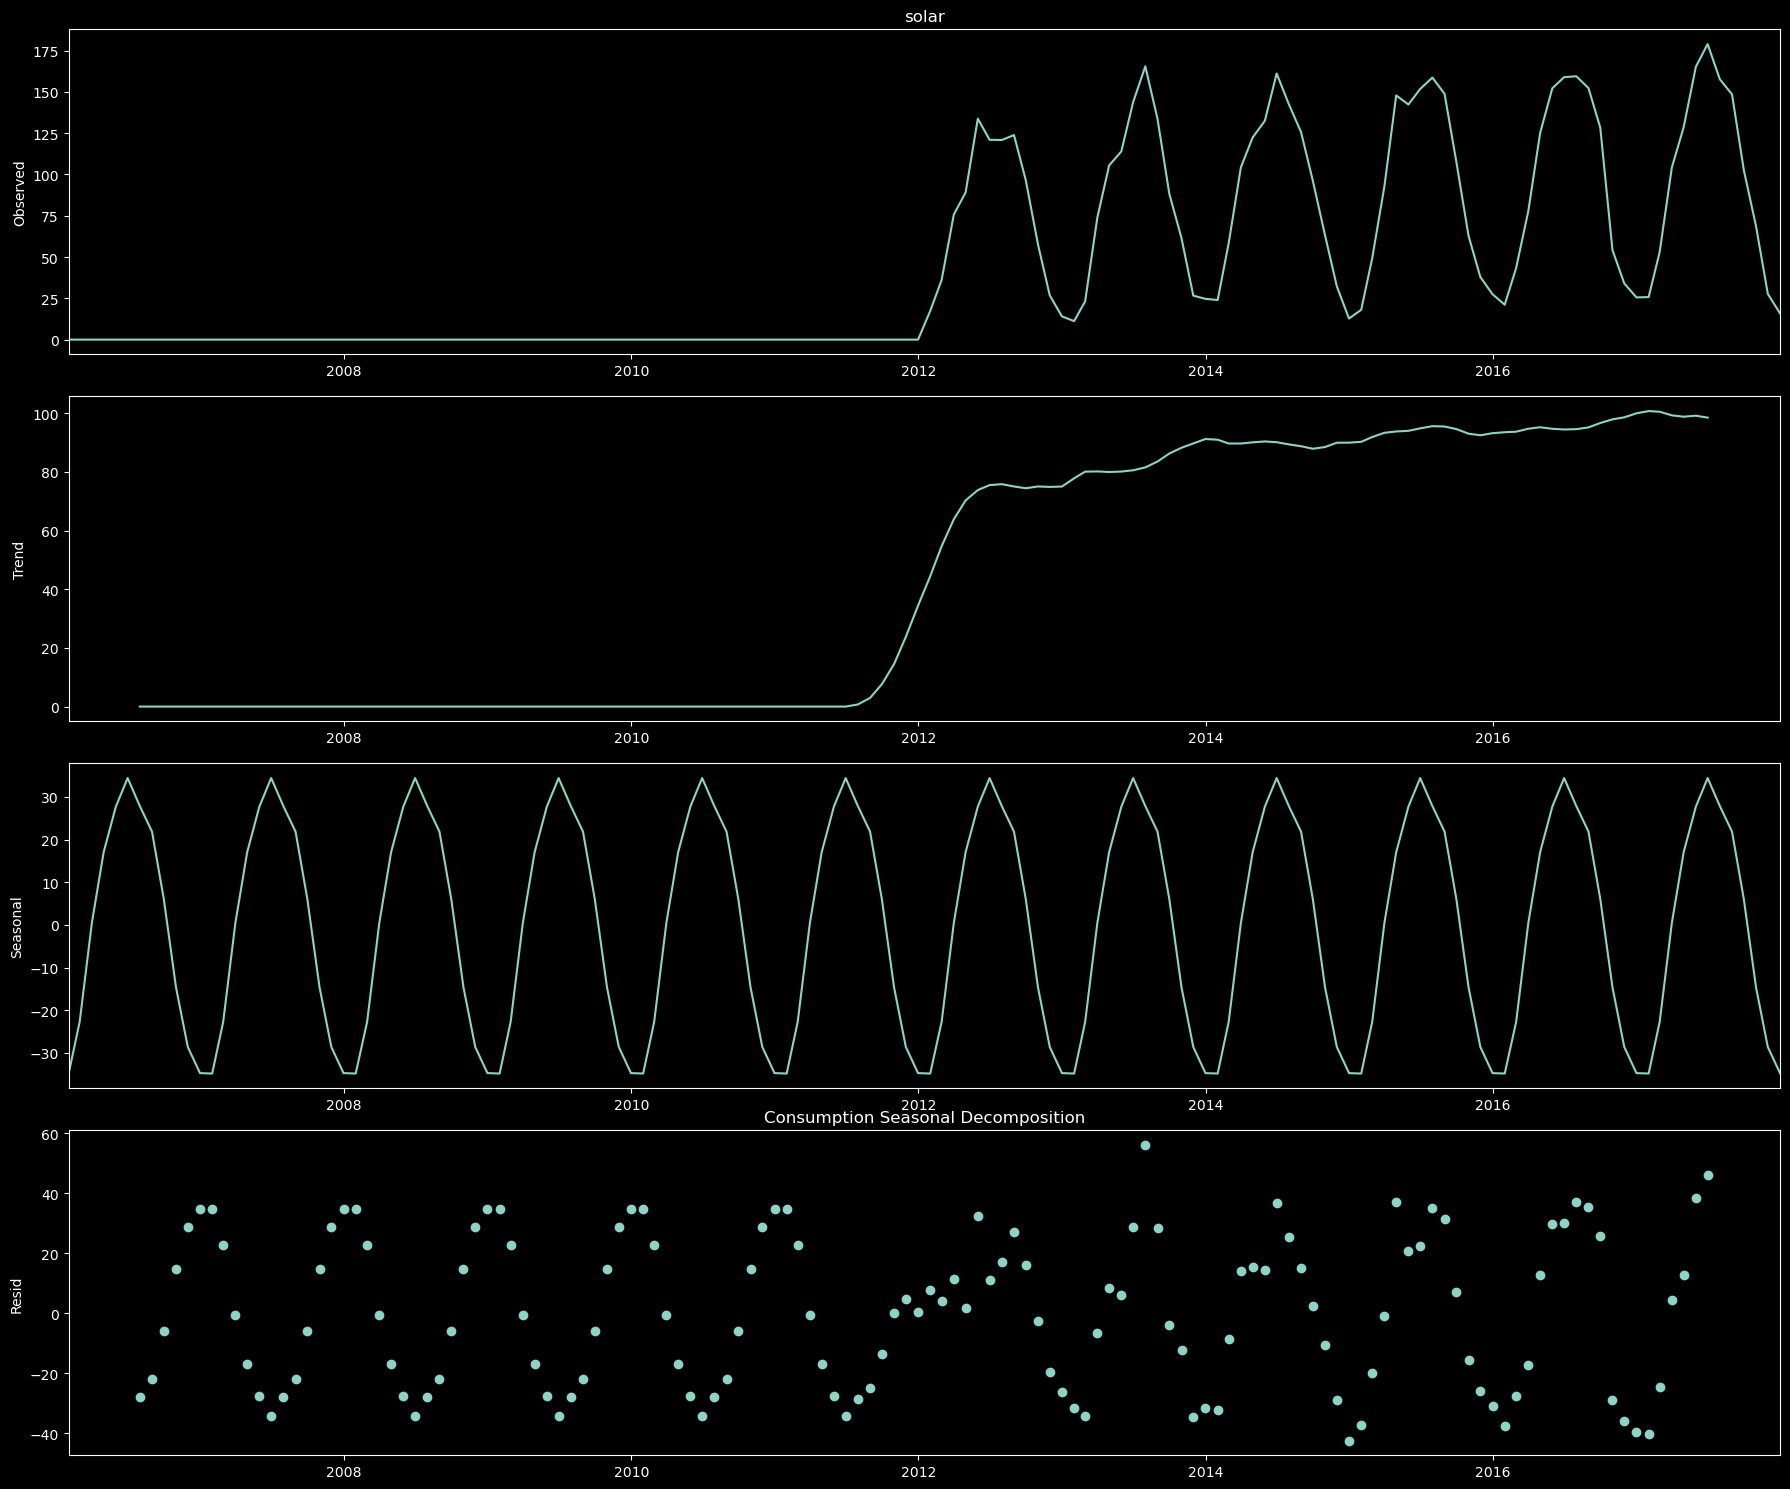

In [41]:
decomposition = sm.tsa.seasonal_decompose(solar, model='additive')
fig = decomposition.plot()
fig.axes[0].set_ylabel('Observed')
# Set a larger figure size
rcParams['figure.figsize'] = 18, 15
plt.title('Consumption Seasonal Decomposition')
plt.show()

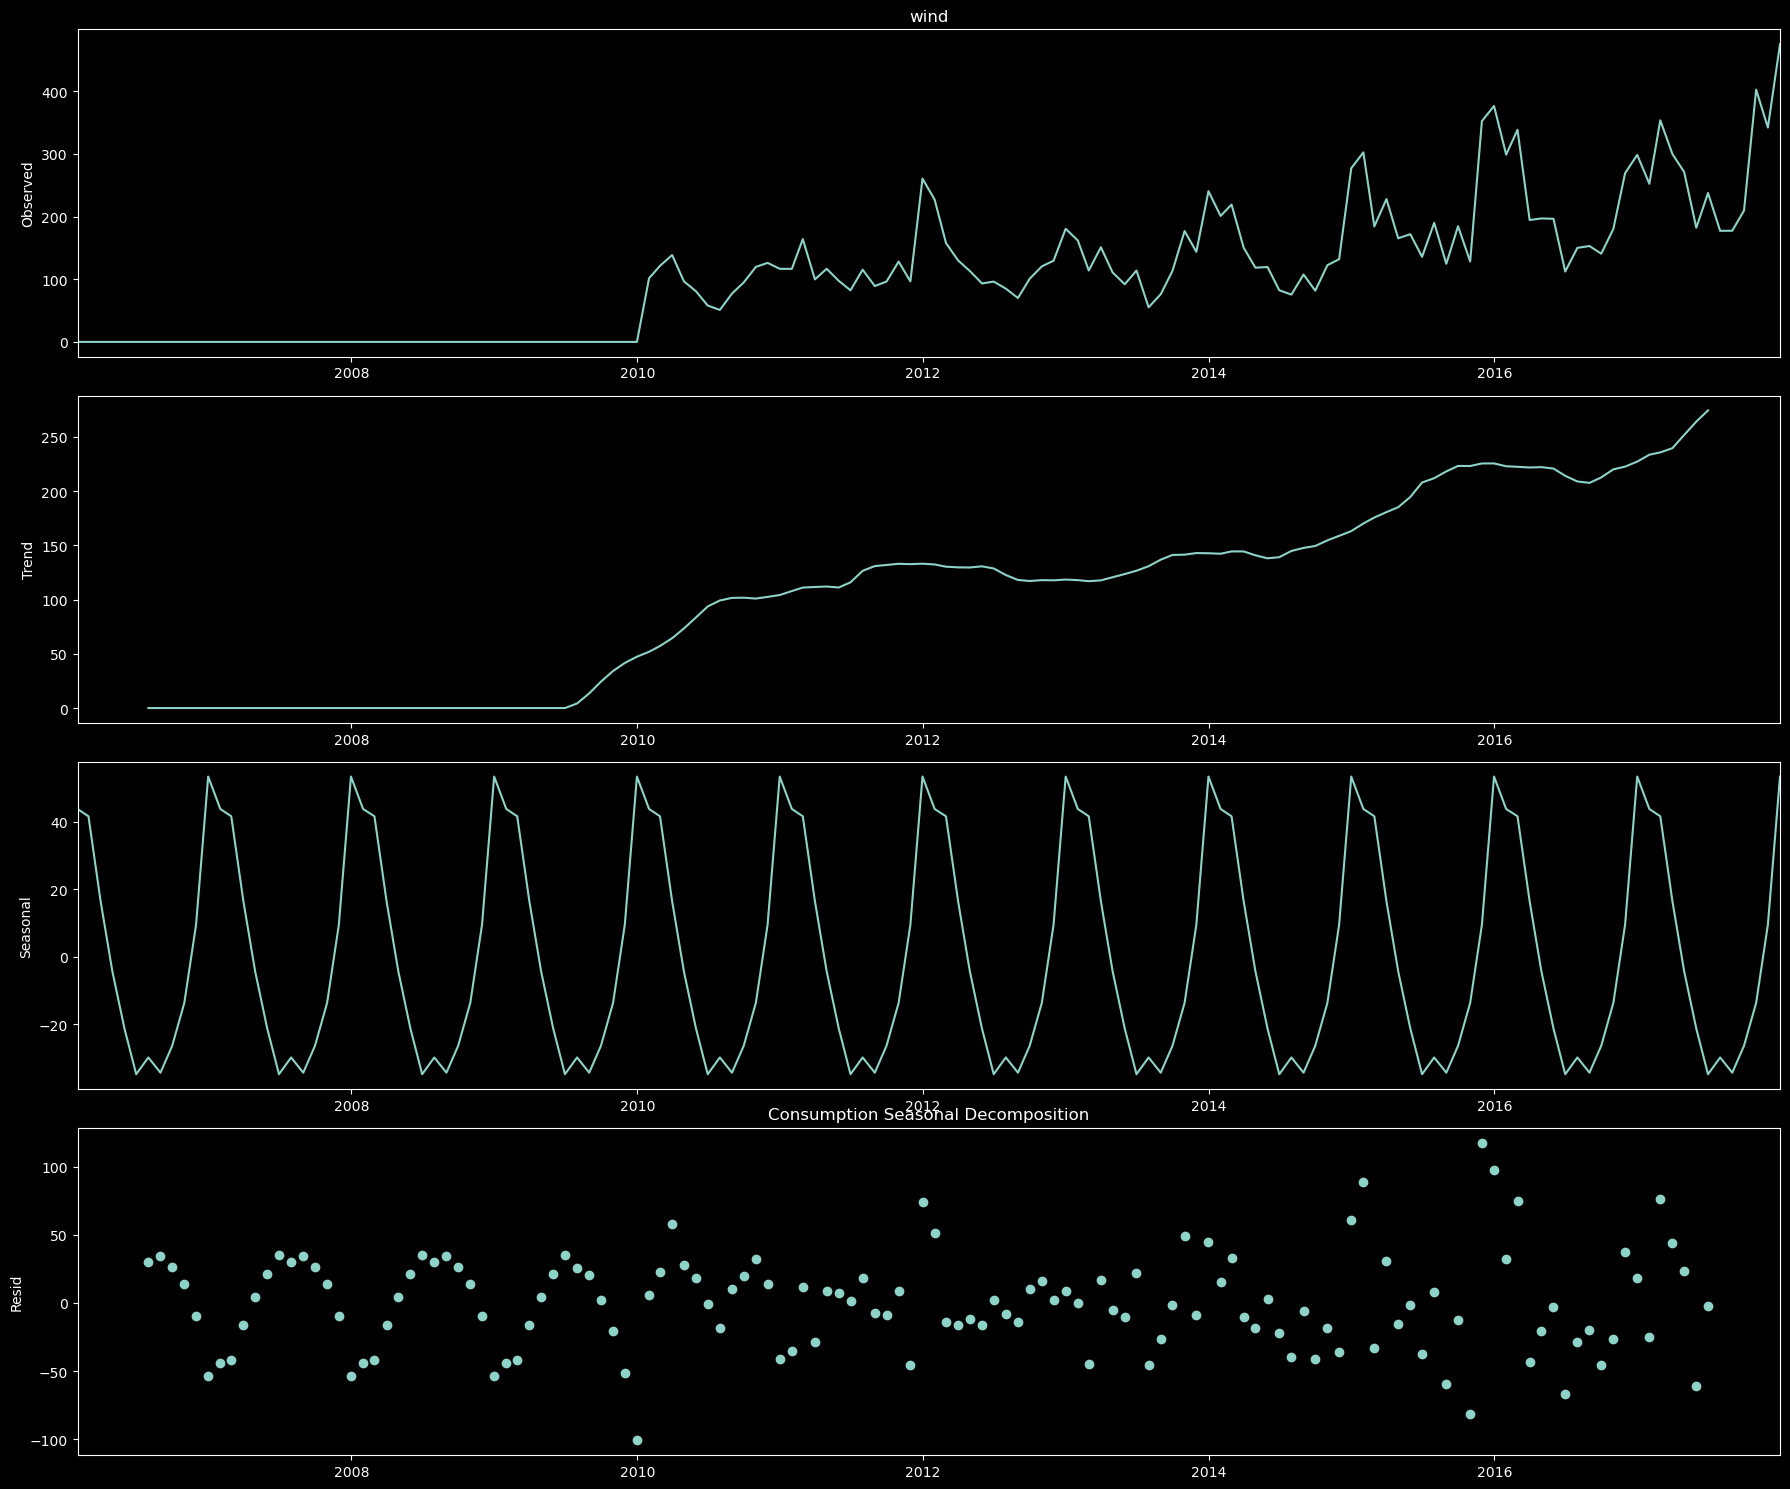

In [42]:
decomposition = sm.tsa.seasonal_decompose(wind, model='additive')
fig = decomposition.plot()
fig.axes[0].set_ylabel('Observed')
# Set a larger figure size
rcParams['figure.figsize'] = 18, 15
plt.title('Consumption Seasonal Decomposition')
plt.show()